In [1]:
#tablice wielowymiarowe w Julii
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
#size(B,1)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall,Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [4]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [5]:
A=rand(1000,1000);
B=rand(1000,1000);

In [6]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
vec(A1)

4-element Array{Int64,1}:
 1
 3
 2
 4

In [7]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(A,1)
    for k=1:size(B,2)
        for i=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [8]:
better_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [9]:
@elapsed naive_multiplication(A,B)

3.412665518

In [10]:
@elapsed better_multiplication(A,B)

1.505569133

In [11]:
@elapsed A*B

0.346560907

In [12]:
# by pozbyć się  ostrzeżeń o przestarzałym oprogramowaniu, 
# należy dodać pakiet bezpośrednio z https://github.com/pjabardo/CurveFit.jl
# poprzez Pkg.clone https://docs.julialang.org/en/stable/manual/packages/#Installing-Unregistered-Packages-1
# uwaga - na next.juliabox.com poprzez osobny interfejs !
using CurveFit
x = [linspace(0, 2, 100);]
y0 = 1 .+ 3*x .+ x.*x .+ randn(100)
fit1 = curve_fit(Poly, x, y0, 2)

Poly(1.1125582245872914 + 3.022363345796187*x + 0.9709598716341786*x^2)

In [13]:
fit1(0)

1.1125582245872914

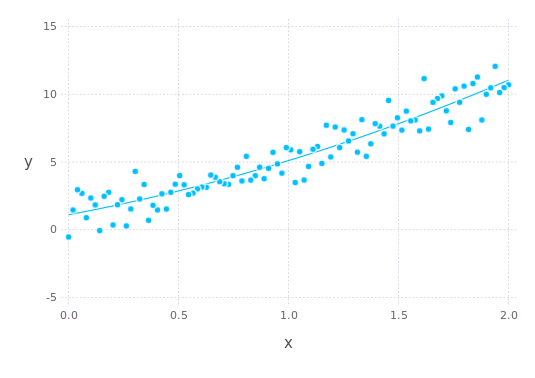

In [14]:
using Gadfly
y0b = fit1(x) 
plot(layer(x=x, y=y0, Geom.point),
    layer(x=x, y=y0b, Geom.line))

### Zadania
 
1.Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.
 
2.Napisać w języku C:
    - naiwną metodę mnożenia macierzy (wersja 1) 
    - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
    - skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 
    
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

3.Użyć funkcji curve_fit  z pakietu  do aproxymacji   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów.

4.Przedstawić wyniki dla języka Julia i C na wspólnym wykresie. Jaka metoda jest najszybsza? 
